In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
x = data.iloc[:,:-1].values

In [6]:
y = data.iloc[:,-1].values

In [8]:
x

array([[  1.57761560e+07,   1.00000000e+00,   2.20800000e+01, ...,
          2.00000000e+00,   1.00000000e+02,   1.21300000e+03],
       [  1.57395480e+07,   0.00000000e+00,   2.26700000e+01, ...,
          2.00000000e+00,   1.60000000e+02,   1.00000000e+00],
       [  1.56628540e+07,   0.00000000e+00,   2.95800000e+01, ...,
          2.00000000e+00,   2.80000000e+02,   1.00000000e+00],
       ..., 
       [  1.56754500e+07,   0.00000000e+00,   1.88300000e+01, ...,
          2.00000000e+00,   1.00000000e+02,   1.00000000e+00],
       [  1.57764940e+07,   0.00000000e+00,   2.74200000e+01, ...,
          2.00000000e+00,   1.20000000e+02,   1.20000000e+01],
       [  1.55924120e+07,   1.00000000e+00,   4.10000000e+01, ...,
          1.00000000e+00,   5.60000000e+02,   1.00000000e+00]])

In [9]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1,

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
sc = MinMaxScaler(feature_range=(0,1))

In [13]:
x = sc.fit_transform(x)

In [14]:
from minisom import MiniSom

In [15]:
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [16]:
som.random_weights_init(x)

In [17]:
som.train_random(data = x,num_iteration=100)

In [18]:
from pylab import bone ,colorbar , pcolor , plot , show

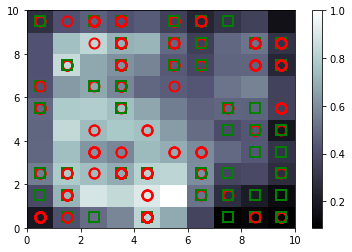

In [20]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, j in enumerate(x):
    w = som.winner(j)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [22]:
mappings = som.win_map(x)

In [26]:
frauds = np.concatenate((mappings[(1,7)], mappings[(2,9)],mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [27]:
frauds.size

1095

In [28]:
customers = data.iloc[:,1:].values

In [29]:
customers.size

10350

In [30]:
##creating dependent variable 
is_fraud = np.zeros(len(data))

In [31]:
# to check if the customers are fraud from the fraud list created above 
for i in range(len(data)):
    if(data.iloc[i,0] in frauds):
        is_fraud[i]=1

In [32]:
is_fraud

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [33]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [50]:
classifier = Sequential()

In [51]:
classifier.add(Dense(units = 2 ,kernel_initializer='uniform',activation='relu',input_dim=15))

In [52]:
classifier.add(Dense(units =2,kernel_initializer='uniform',activation = 'relu'))

In [53]:
classifier.add(Dense(units = 1 ,kernel_initializer='uniform',activation = 'sigmoid'))

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sd = StandardScaler()
customer = sd.fit_transform(customers)

In [56]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])

In [57]:
classifier.fit(customer,is_fraud,batch_size=1 ,epochs =5)

Epoch 1/5
690/690 [==============================] - 0s - loss: 0.5059 - acc: 0.8942     
Epoch 2/5
690/690 [==============================] - 0s - loss: 0.2666 - acc: 0.8942     
Epoch 3/5
690/690 [==============================] - 0s - loss: 0.2268 - acc: 0.8942     
Epoch 4/5
690/690 [==============================] - 0s - loss: 0.2066 - acc: 0.8942     
Epoch 5/5
690/690 [==============================] - 0s - loss: 0.1899 - acc: 0.8942     


In [58]:
y_pred = classifier.predict(customer)

In [59]:
y_pred

array([[  3.77911739e-02],
       [  2.97836363e-01],
       [  1.02533437e-02],
       [  2.71437864e-04],
       [  2.16895062e-03],
       [  4.55687791e-02],
       [  3.14188629e-01],
       [  6.89556869e-03],
       [  1.17005251e-01],
       [  3.43653664e-04],
       [  1.15152441e-04],
       [  9.67110973e-05],
       [  4.89987397e-05],
       [  1.03443839e-04],
       [  3.65198893e-03],
       [  2.84287602e-01],
       [  2.08320213e-04],
       [  5.51529229e-02],
       [  1.36341199e-01],
       [  2.31180638e-02],
       [  2.23411933e-01],
       [  5.62614482e-03],
       [  2.41756380e-01],
       [  8.60098526e-02],
       [  3.14188629e-01],
       [  1.16117932e-04],
       [  1.18504025e-01],
       [  3.01000080e-04],
       [  4.92103547e-02],
       [  1.53348170e-04],
       [  1.98726324e-04],
       [  1.96978394e-02],
       [  3.03107459e-04],
       [  2.38368229e-04],
       [  2.34649822e-04],
       [  2.82301148e-03],
       [  1.39827244e-02],
 

In [60]:
y_pred = np.concatenate((data.iloc[:,0:1].values,y_pred),axis=1)

In [61]:
y_pred

array([[  1.57761560e+07,   3.77911739e-02],
       [  1.57395480e+07,   2.97836363e-01],
       [  1.56628540e+07,   1.02533437e-02],
       ..., 
       [  1.56754500e+07,   3.14188629e-01],
       [  1.57764940e+07,   3.97256166e-02],
       [  1.55924120e+07,   1.37741473e-02]])

In [62]:
y_pred = y_pred[y_pred[:,1].argsort()]

In [63]:
y_pred

array([[  1.56214230e+07,   1.19132551e-06],
       [  1.57752350e+07,   1.55979633e-05],
       [  1.55723610e+07,   2.12649211e-05],
       ..., 
       [  1.55818710e+07,   3.14188629e-01],
       [  1.57293770e+07,   3.14188629e-01],
       [  1.57261670e+07,   3.14188629e-01]])